# LANGUAGE DETECTION SYSTEM USING MACHINE LEARNING

In [117]:
#IMPORTING LIBRARIES

import pandas as pd
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import pipeline
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

In [71]:
#Loading data frames of different dataset
df=pd.read_csv('filtered_languages.csv')
df

,Text,Language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
16126,ਇਸ ਨੂੰ IPA ਵਿੱਚ ਲਿਖਿਆ ਜਾਵੇਗਾ,Punjabi
16127,ਇਸ ਕਾਨੂੰਨ ਦੀ ਉਦੇਸ਼ਕਾ ਵਿੱਚ ਇਹ ਐਕਟ ਬਣਾਉਣ ਦਾ ਉਦੇ...,Punjabi
16128,थोडे सोंस्था जोसि कि बोंबोइचें कोंकणी भाशा मों...,Konkani
16129,"भारतस्य पूर्वभागे बाङ्ग्लादेशः बर्मादेशः, बङ्...",Sanskrit


In [72]:
df.isnull().sum()

Text        12
Language     0
dtype: int64

 # Exploratory Data Analysis (EDA)

In [73]:
#checking missing values
df['Text'].isnull().sum()

12

In [74]:
#handling punctuation data
def remove_pun(Text):
    if isinstance(Text,str):
        for pun in string.punctuation:
            Text=Text.replace(pun,"")
        Text=Text.lower()
    return Text

In [75]:
#filling the missing values with no space
df['Text']=df['Text'].fillna("")

In [76]:
#applying remove_pun function 
df['Text']=df['Text'].apply(remove_pun)
df

,Text,Language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
16126,ਇਸ ਨੂੰ ipa ਵਿੱਚ ਲਿਖਿਆ ਜਾਵੇਗਾ,Punjabi
16127,ਇਸ ਕਾਨੂੰਨ ਦੀ ਉਦੇਸ਼ਕਾ ਵਿੱਚ ਇਹ ਐਕਟ ਬਣਾਉਣ ਦਾ ਉਦੇ...,Punjabi
16128,थोडे सोंस्था जोसि कि बोंबोइचें कोंकणी भाशा मों...,Konkani
16129,भारतस्य पूर्वभागे बाङ्ग्लादेशः बर्मादेशः बङ्ग...,Sanskrit


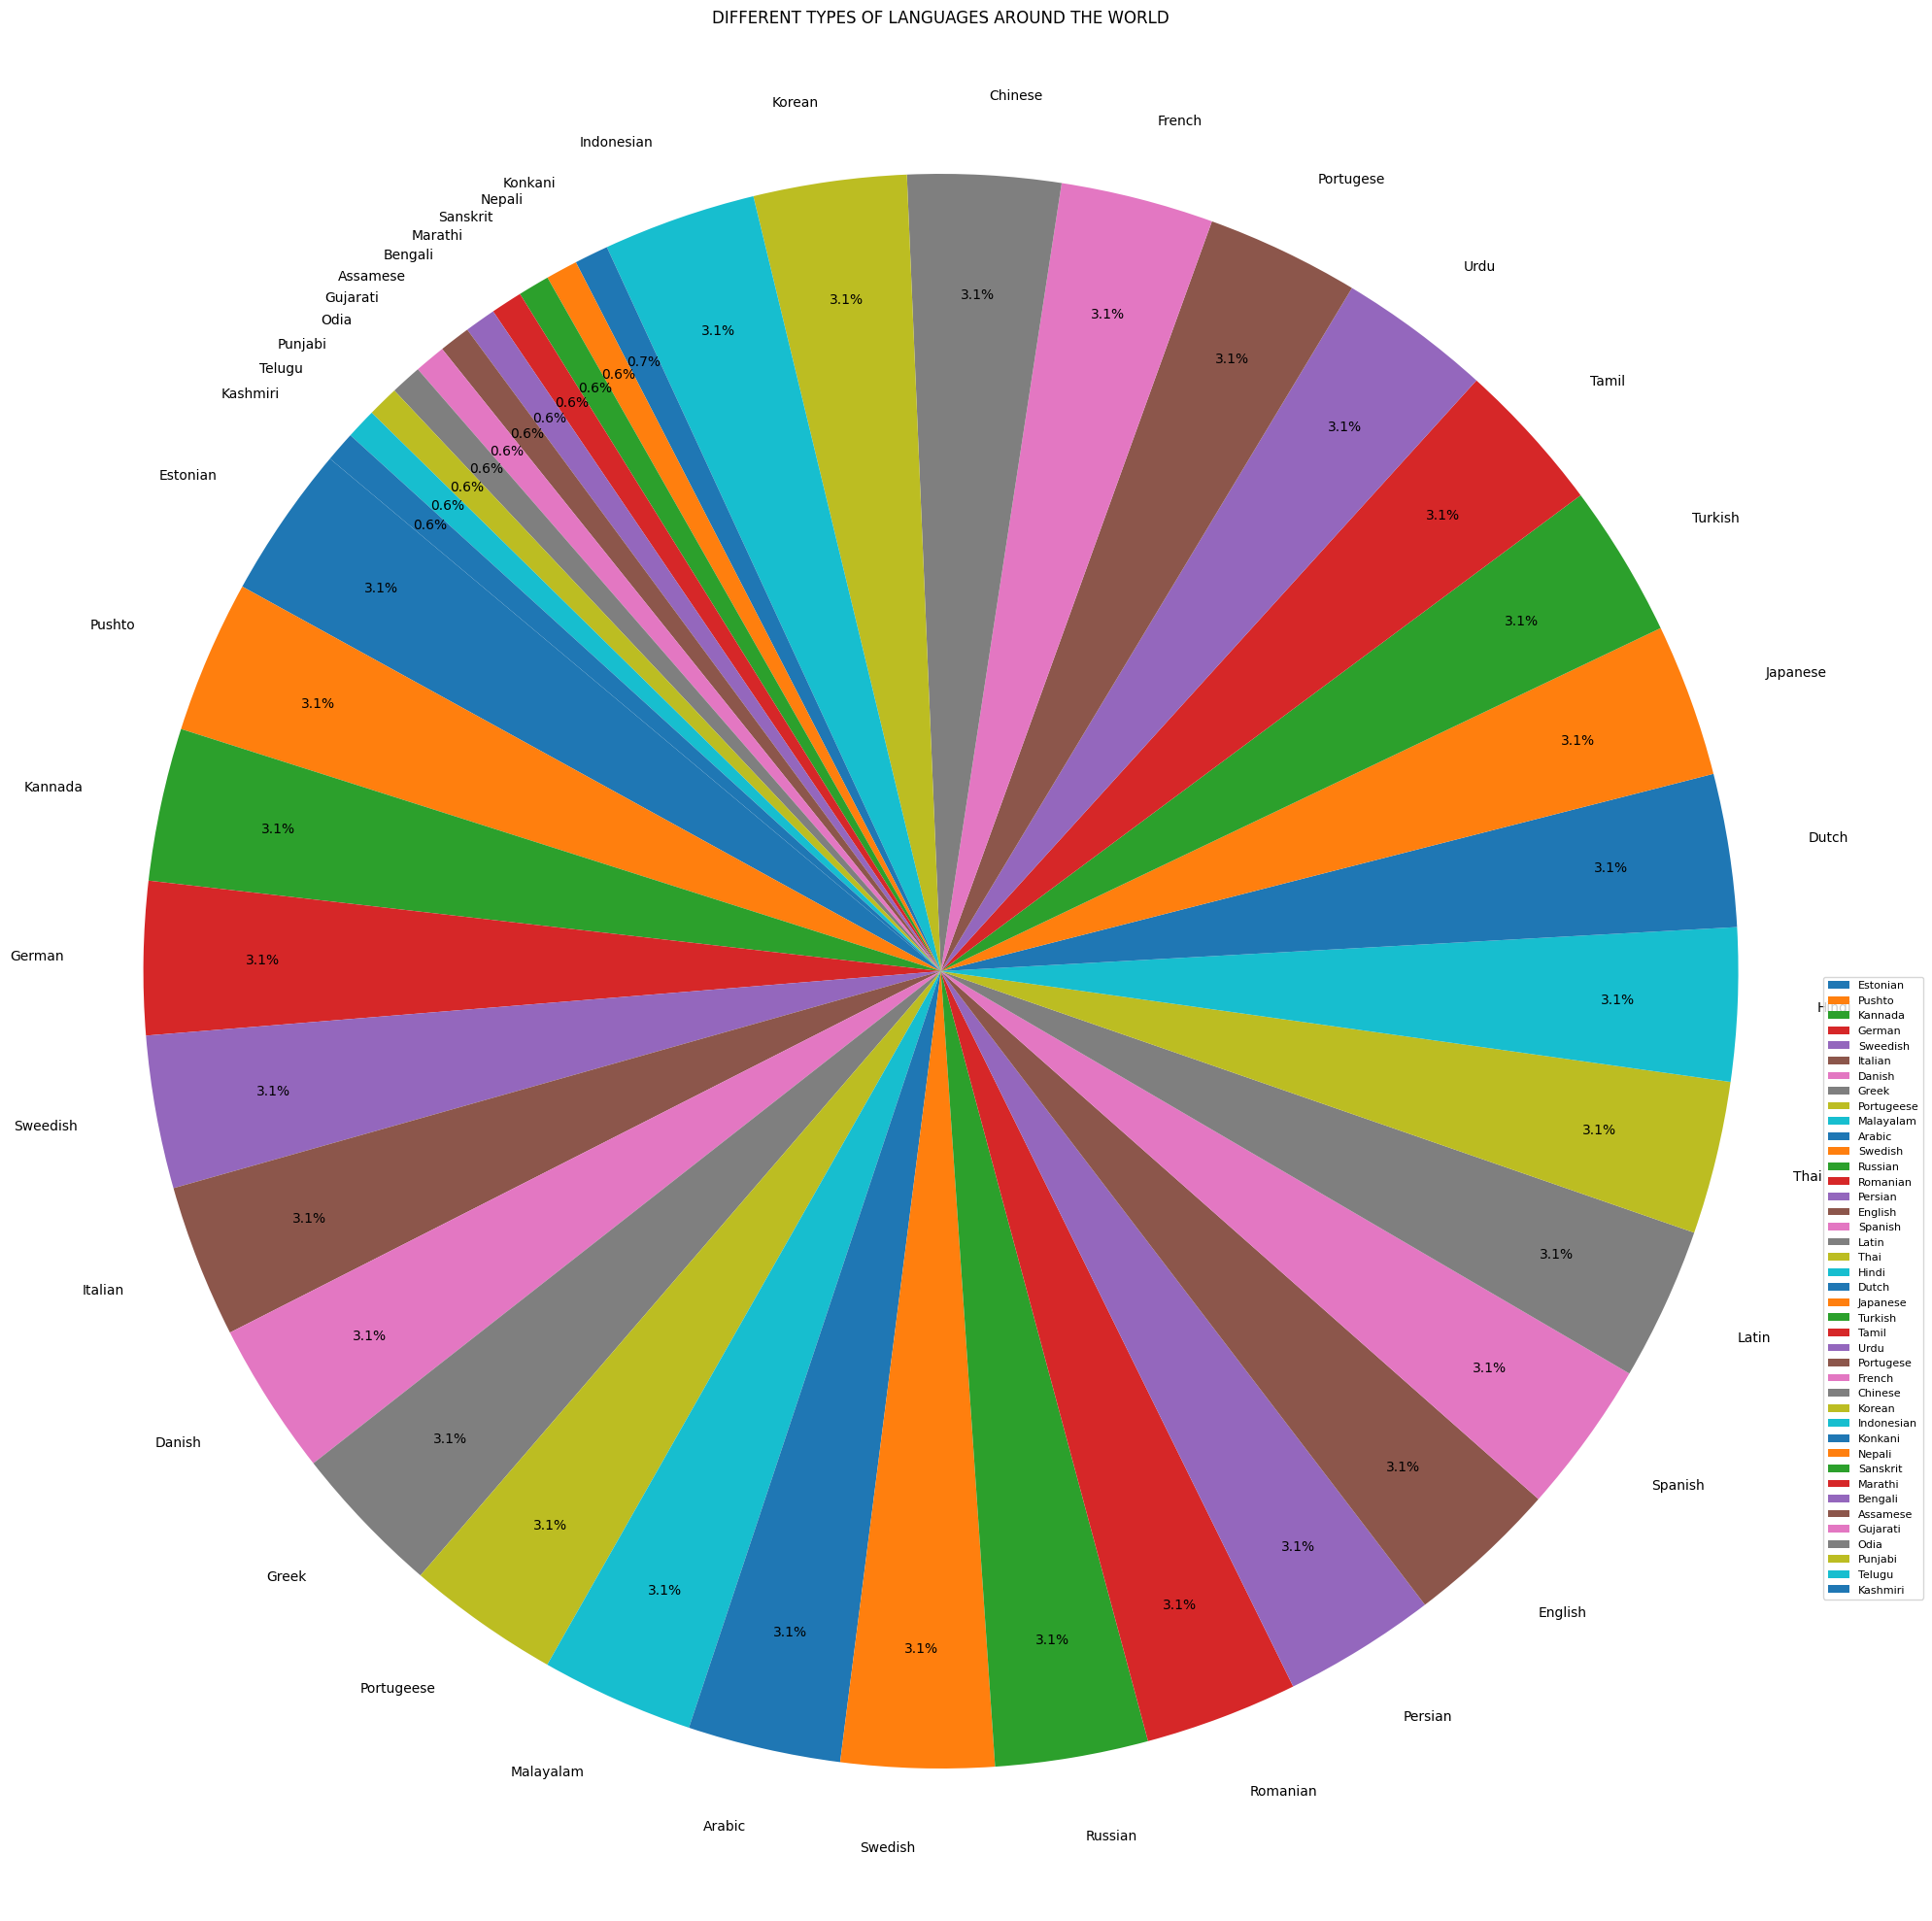

In [77]:
# For visualization
lang_count = df['Language'].value_counts()

plt.figure(figsize=(20, 20))  # Increase the figure size for better readability
# Using a pie chart
plt.pie(lang_count, labels=lang_count.index, autopct='%1.1f%%', startangle=140, 
        textprops={'fontsize': 10}, pctdistance=0.85)  # Adjust text size and position

plt.title('DIFFERENT TYPES OF LANGUAGES AROUND THE WORLD')
plt.legend(loc="best", fontsize=8, bbox_to_anchor=(1, 0.5))  # Use a legend to reduce label clutter
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [78]:
# Prepare data for model training
X=df.iloc[:,0]
Y=df.iloc[:,1]

In [79]:
#split the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.50,random_state=42)

In [80]:
# Initialize the vectorizer
vec = TfidfVectorizer(ngram_range=(1, 2), analyzer='char')
vec

TfidfVectorizer(analyzer='char', ngram_range=(1, 2))

In [81]:
Vectorizer = TfidfVectorizer() #Term frequency-Inverse Document Frequency

In [82]:
# Initialize vectorizer
vec = TfidfVectorizer(ngram_range=(1, 2), analyzer='char')

In [118]:
# Encode labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Define models

In [137]:
# Define models and pipelines
vec = TfidfVectorizer(analyzer='char')

# Random Forest
rf_pipeline = Pipeline([
    ('vec', vec),
    ('clf', RandomForestClassifier(n_jobs=-1, random_state=42))
])
rf_param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# SVM
svm_pipeline = Pipeline([
    ('vec', vec),
    ('clf', SVC(probability=True, random_state=42))
])
svm_param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto']
}

# Naive Bayes
nb_pipeline = Pipeline([
    ('vec', TfidfVectorizer(ngram_range=(1, 3), analyzer='char', max_features=5000)),
    ('clf', MultinomialNB())
])
nb_param_grid = {
    'clf__alpha': [0.1, 0.5, 1, 2, 5]
}

# Define parameter grids for other models (Decision Tree, KNN, XGBoost)
dt_pipeline = Pipeline([
    ('vec', vec),
    ('clf', DecisionTreeClassifier(random_state=42))
])
dt_param_grid = {
    'clf__max_depth': [10, 20, 30],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2]
}

knn_pipeline = Pipeline([
    ('vec', vec),
    ('clf', KNeighborsClassifier())
])
knn_param_grid = {
    'clf__n_neighbors': [3, 5, 7]
}

xgb_pipeline = Pipeline([
    ('vec', vec),
    ('clf', XGBClassifier(eval_metric='mlogloss'))
])
xgb_param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [6, 10],
    'clf__learning_rate': [0.1, 0.3]
}


In [138]:
# Perform GridSearchCV for each model
grid_search_rf = GridSearchCV(estimator=rf_pipeline, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, Y_train_encoded)

grid_search_svm = GridSearchCV(estimator=svm_pipeline, param_grid=svm_param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, Y_train_encoded)

grid_search_nb = GridSearchCV(estimator=nb_pipeline, param_grid=nb_param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_nb.fit(X_train, Y_train_encoded)

grid_search_dt = GridSearchCV(estimator=dt_pipeline, param_grid=dt_param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, Y_train_encoded)

grid_search_knn = GridSearchCV(estimator=knn_pipeline, param_grid=knn_param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, Y_train_encoded)

grid_search_xgb = GridSearchCV(estimator=xgb_pipeline, param_grid=xgb_param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, Y_train_encoded)

# Extract best models
best_rf_model = grid_search_rf.best_estimator_
best_svm_model = grid_search_svm.best_estimator_
best_nb_model = grid_search_nb.best_estimator_
best_dt_model = grid_search_dt.best_estimator_
best_knn_model = grid_search_knn.best_estimator_
best_xgb_model = grid_search_xgb.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [139]:
def evaluate_pipeline(pipeline, X_train, X_test, Y_train, Y_test):
    y_pred = pipeline.predict(X_test)
    return {
        'Accuracy': accuracy_score(Y_test, Y_pred),
        'F1 Score': f1_score(Y_test, Y_pred, average='weighted'),
        'Precision': precision_score(Y_test, Y_pred, average='weighted'),
        'Recall': recall_score(Y_test, Y_pred, average='weighted')
    }

# Evaluate each best model
best_rf_metrics = evaluate_pipeline(best_rf_model, X_train, X_test, Y_train_encoded, Y_test_encoded)
best_svm_metrics = evaluate_pipeline(best_svm_model, X_train, X_test, Y_train_encoded, Y_test_encoded)
best_nb_metrics = evaluate_pipeline(best_nb_model, X_train, X_test, Y_train_encoded, Y_test_encoded)
best_dt_metrics = evaluate_pipeline(best_dt_model, X_train, X_test, Y_train_encoded, Y_test_encoded)
best_knn_metrics = evaluate_pipeline(best_knn_model, X_train, X_test, Y_train_encoded, Y_test_encoded)
best_xgb_metrics = evaluate_pipeline(best_xgb_model, X_train, X_test, Y_train_encoded, Y_test_encoded)


In [140]:
# Store and print the results
best_results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Naive Bayes', 'Decision Tree', 'KNN', 'XGBoost'],
    'Accuracy': [
        best_rf_metrics['Accuracy'],
        best_svm_metrics['Accuracy'],
        best_nb_metrics['Accuracy'],
        best_dt_metrics['Accuracy'],
        best_knn_metrics['Accuracy'],
        best_xgb_metrics['Accuracy']
    ],
    'F1 Score': [
        best_rf_metrics['F1 Score'],
        best_svm_metrics['F1 Score'],
        best_nb_metrics['F1 Score'],
        best_dt_metrics['F1 Score'],
        best_knn_metrics['F1 Score'],
        best_xgb_metrics['F1 Score']
    ],
    'Precision': [
        best_rf_metrics['Precision'],
        best_svm_metrics['Precision'],
        best_nb_metrics['Precision'],
        best_dt_metrics['Precision'],
        best_knn_metrics['Precision'],
        best_xgb_metrics['Precision']
    ],
    'Recall': [
        best_rf_metrics['Recall'],
        best_svm_metrics['Recall'],
        best_nb_metrics['Recall'],
        best_dt_metrics['Recall'],
        best_knn_metrics['Recall'],
        best_xgb_metrics['Recall']
    ]
})

print(best_results)


           Model  Accuracy  F1 Score  Precision   Recall
0  Random Forest   0.94545  0.945948   0.947677  0.94545
1            SVM   0.94545  0.945948   0.947677  0.94545
2    Naive Bayes   0.94545  0.945948   0.947677  0.94545
3  Decision Tree   0.94545  0.945948   0.947677  0.94545
4            KNN   0.94545  0.945948   0.947677  0.94545
5        XGBoost   0.94545  0.945948   0.947677  0.94545


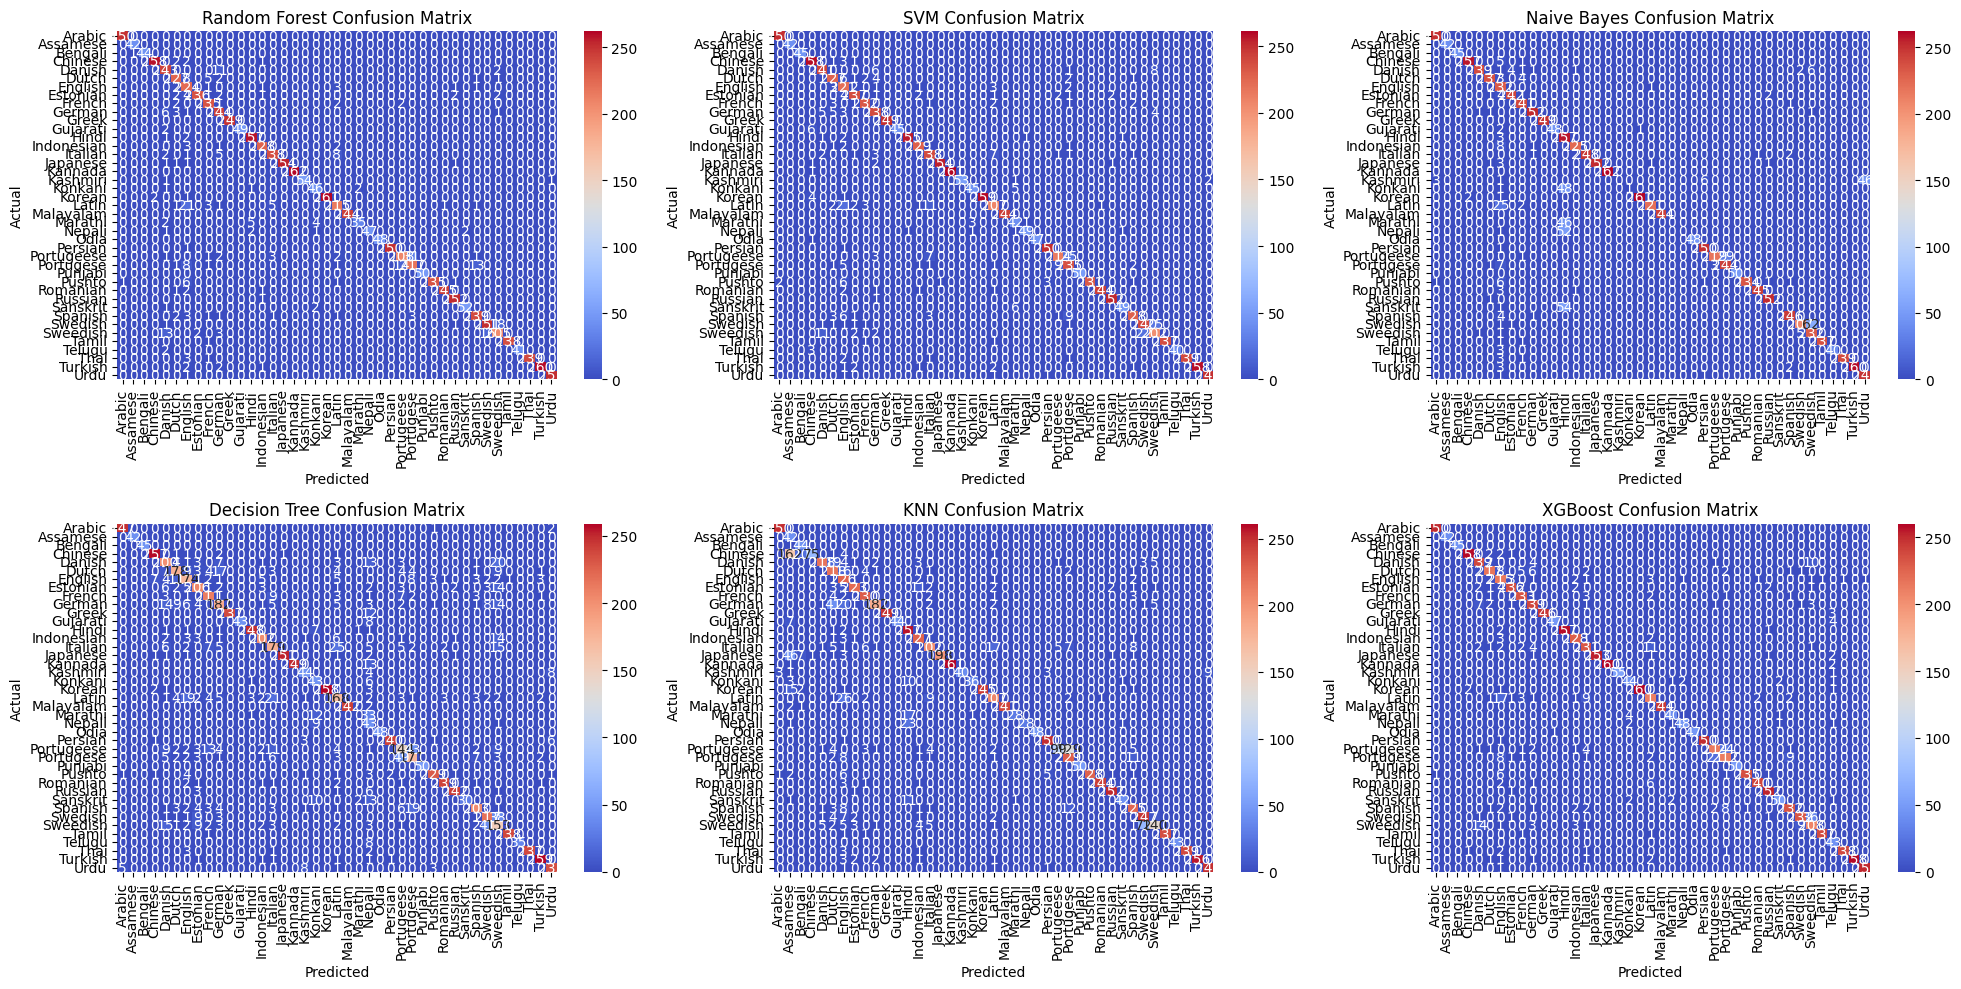

In [144]:
# Plotting Confusion Matrices
plt.figure(figsize=(20, 10))

# Random Forest
plt.subplot(2, 3, 1)
cmx_rf = confusion_matrix(Y_test_encoded, best_rf_model.predict(X_test))
sns.heatmap(cmx_rf, annot=True, fmt="d", cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# SVM
plt.subplot(2, 3, 2)
cmx_svm = confusion_matrix(Y_test_encoded, best_svm_model.predict(X_test))
sns.heatmap(cmx_svm, annot=True, fmt="d", cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Naive Bayes
plt.subplot(2, 3, 3)
cmx_nb = confusion_matrix(Y_test_encoded, best_nb_model.predict(X_test))
sns.heatmap(cmx_nb, annot=True, fmt="d", cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Decision Tree
plt.subplot(2, 3, 4)
cmx_dt = confusion_matrix(Y_test_encoded, best_dt_model.predict(X_test))
sns.heatmap(cmx_dt, annot=True, fmt="d", cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# KNN
plt.subplot(2, 3, 5)
cmx_knn = confusion_matrix(Y_test_encoded, best_knn_model.predict(X_test))
sns.heatmap(cmx_knn, annot=True, fmt="d", cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# XGBoost
plt.subplot(2, 3, 6)
cmx_xgb = confusion_matrix(Y_test_encoded, best_xgb_model.predict(X_test))
sns.heatmap(cmx_xgb, annot=True, fmt="d", cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [142]:
# Initialize a DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [143]:
# Loop over each model and perform GridSearchCV with time reduction
for model_name, model in models.items():
    # Create pipeline
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(analyzer='char')),
        ('clf', model)
    ])

In [129]:
# Define GridSearchCV with fewer folds and parallel processing
grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=3, n_jobs=-1, verbose=2)    

In [130]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train_encoded)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(analyzer='char')),
                                       ('clf',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='mlogloss',
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=No...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'clf__learning_rate': [0.1], 'clf__max_depth': [6],
                         'clf__n_estimators': [100],
                         'tfidf__ngram_range': [(1, 1)]},
             verbose=2)

In [131]:
# Make predictions
Y_pred = grid_search.predict(X_test)

In [133]:
# Calculate metrics
accuracy = accuracy_score(Y_test_encoded, Y_pred)
f1 = f1_score(Y_test_encoded, Y_pred, average='weighted')
precision = precision_score(Y_test_encoded, Y_pred, average='weighted')
recall = recall_score(Y_test_encoded, Y_pred, average='weighted')

In [ ]:
# Append results to the DataFrame
    results = results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    }, ignore_index=True)

In [134]:
#Display the results
print(results)

Empty DataFrame
Columns: [Model, Accuracy, F1 Score, Precision, Recall]
Index: []


# Hyperparameter tuning

In [84]:
# Import additional libraries for GridSearchCV
from sklearn.pipeline import Pipeline

In [85]:
# Now, we implement the GridSearchCV
# Define a pipeline that includes both the TfidfVectorizer and RandomForestClassifier

pipeline=Pipeline([
    ('tfidf',TfidfVectorizer(ngram_range=(1,2),analyzer='char')),
    ('clf',RandomForestClassifier())
])

In [86]:
# Define the parameter grid to search over
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Testing different n-gram ranges
    'tfidf__analyzer': ['char', 'word'],  # Char or word level n-grams
    'clf__n_estimators': [100, 200],  # Number of trees in the forest
    'clf__max_depth': [None, 10, 20],  # Maximum depth of the tree
    'clf__min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'clf__min_samples_leaf': [1, 2]  # Minimum number of samples required at each leaf node
}

In [87]:
# Set up the GridSearchCV object with cross-validation
#grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

In [88]:
# Set up the GridSearchCV object with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)

In [89]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(analyzer='char',
                                                        ngram_range=(1, 2))),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [None, 10, 20],
                         'clf__min_samples_leaf': [1, 2],
                         'clf__min_samples_split': [2, 5],
                         'clf__n_estimators': [100, 200],
                         'tfidf__analyzer': ['char', 'word'],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             verbose=2)

# Evaluate the best model on the test set

In [90]:
Y_pred = grid_search.predict(X_test)

In [91]:
# Print out the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100, 'tfidf__analyzer': 'char', 'tfidf__ngram_range': (1, 2)}


In [92]:
#Display Accuracy
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.9639226382345648


In [93]:
# Display classification report with precision, recall, and F1-score
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       250
    Assamese       1.00      1.00      1.00        42
     Bengali       1.00      1.00      1.00        45
     Chinese       0.99      0.98      0.99       263
      Danish       0.90      0.97      0.93       256
       Dutch       0.99      0.97      0.98       244
     English       0.77      1.00      0.87       233
    Estonian       0.99      0.96      0.97       250
      French       0.96      0.99      0.98       242
      German       0.90      0.98      0.94       255
       Greek       1.00      1.00      1.00       249
    Gujarati       0.91      0.98      0.94        51
       Hindi       0.97      0.99      0.98       260
  Indonesian       1.00      0.97      0.98       234
     Italian       0.95      0.96      0.96       254
    Japanese       1.00      0.98      0.99       258
     Kannada       1.00      1.00      1.00       262
    Kashmiri       1.00    

In [94]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [95]:
# Define the models
decision_tree = DecisionTreeClassifier()
naive_bayes = MultinomialNB()
random_forest=RandomForestClassifier()
support_vector_machine=SVC()
knn=KNeighborsClassifier()
xgboost=XGBClassifier()

In [96]:
# Create a VotingClassifier to combine models
voting_clf = VotingClassifier(estimators=[
    ('DT', decision_tree),
    ('NB', naive_bayes),
    ('RF',random_forest),
    ('SVM',support_vector_machine),
    ('KNN',knn),
    ('XGB',xgboost)
],voting='hard')

In [97]:
# Create a pipeline with the vectorizer and the voting classifier
from sklearn.pipeline import Pipeline
model_pipe=Pipeline([
    ('vec',vec),
    ('clf',voting_clf)
])

In [98]:
model_pipe.fit(X_train,Y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('clf',
                 VotingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                                              ('NB', MultinomialNB()),
                                              ('RF', RandomForestClassifier()),
                                              ('SVM', SVC()),
                                              ('KNN', KNeighborsClassifier()),
                                              ('XGB',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=No...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))]))])

In [99]:
Y_pred=model_pipe.predict(X_test)

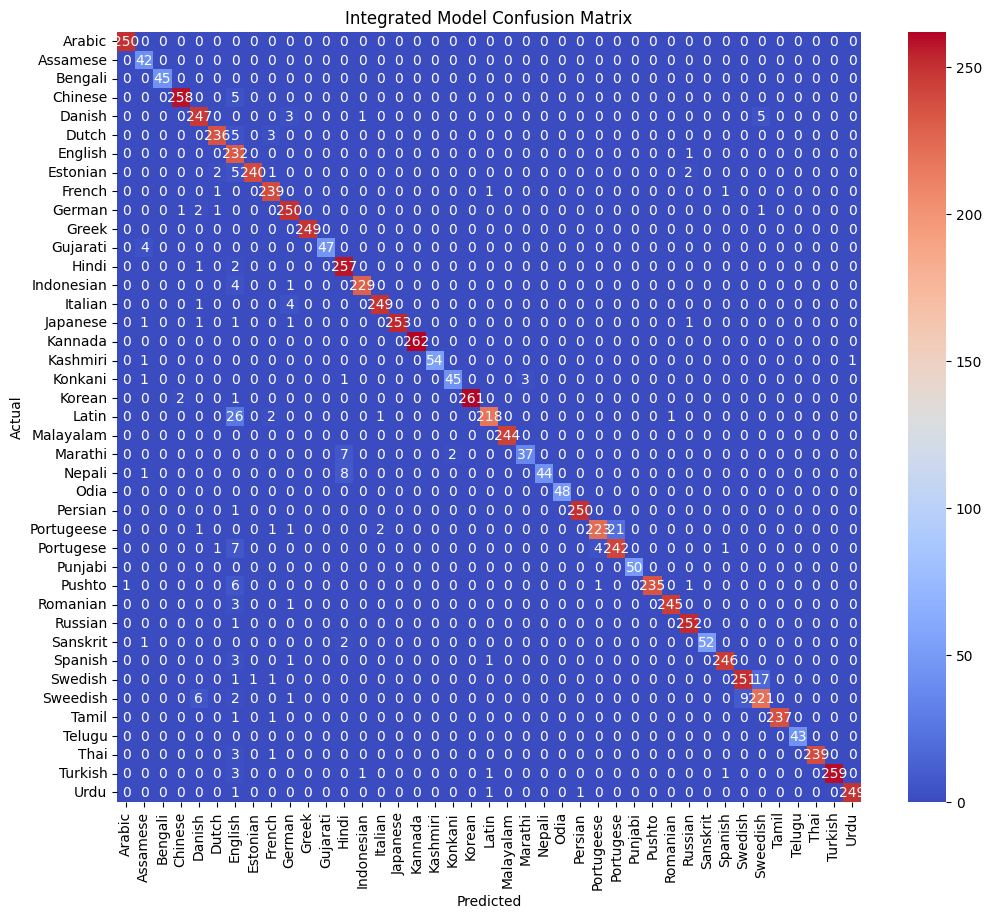

In [101]:
# Confusion Matrix for the integrated model
plt.figure(figsize=(12, 10))
cmx_model = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cmx_model, annot=True, fmt="d", cmap='coolwarm', xticklabels=sorted(set(Y)), yticklabels=sorted(set(Y)))
plt.title('Integrated Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# TESTING

In [102]:
model_pipe.predict(['भारतस्य पूर्वभागे बाङ्ग्लादेशः बर्मादेशः, बङ्'])

array(['Sanskrit'], dtype=object)

#  MODEL EVALUATION

In [105]:
# Evaluate the integrated model
model_accuracy = accuracy_score(Y_test, Y_pred)
model_f1 = f1_score(Y_test, Y_pred, average='weighted')
model_precision = precision_score(Y_test, Y_pred, average='weighted')
model_recall = recall_score(Y_test, Y_pred, average='weighted')

print(f"Integrated Model Accuracy: {model_accuracy:.4f}")
print(f"Integrated Model F1 Score: {model_f1:.4f}")
print(f"Integrated Model Precision: {model_precision:.4f}")
print(f"Integrated Model Recall: {model_recall:.4f}")

Integrated Model Accuracy: 0.9707
Integrated Model F1 Score: 0.9713
Integrated Model Precision: 0.9736
Integrated Model Recall: 0.9707


In [145]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_pipeline(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(Y_test, Y_pred),
        'F1 Score': f1_score(Y_test, Y_pred, average='weighted'),
        'Precision': precision_score(Y_test, Y_pred, average='weighted'),
        'Recall': recall_score(Y_test, Y_pred, average='weighted')
    }
    return metrics


In [147]:
# Evaluate the best pipelines with the best parameters after hyperparameter tuning
best_rf_metrics = evaluate_pipeline(best_rf_model, X_train, X_test, Y_train, Y_test)
best_svm_metrics = evaluate_pipeline(best_svm_model, X_train, X_test, Y_train, Y_test)
best_nb_metrics = evaluate_pipeline(best_nb_model, X_train, X_test, Y_train, Y_test)
best_rf_metrics = evaluate_pipeline(best_rf_model, X_train, X_test, Y_train, Y_test)
best_svm_metrics = evaluate_pipeline(best_svm_model, X_train, X_test, Y_train, Y_test)
best_nb_metrics = evaluate_pipeline(best_nb_model, X_train, X_test, Y_train, Y_test)

C:\Users\nagav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nagav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [153]:
# Create a DataFrame to display results
tuned_results_df = pd.DataFrame([best_rf_metrics, best_svm_metrics, best_nb_metrics,best_dt_metrics,best_knn_metrics,best_xgb_metrics], index=['Random Forest', 'SVM', 'Naive Bayes','Decision Tree','KNN','XGBoost'])


In [154]:
# Print the results in table form
print("\nTuned Model Evaluation Results:")
tuned_results_df


Tuned Model Evaluation Results:


,Accuracy,F1 Score,Precision,Recall
Random Forest,0.957476,0.957741,0.959387,0.957476
SVM,0.952889,0.953302,0.955018,0.952889
Naive Bayes,0.936896,0.925448,0.927410,0.936896
Decision Tree,0.857798,0.860872,0.868822,0.857798
KNN,0.873915,0.876668,0.914859,0.873915
XGBoost,0.948054,0.948525,0.950115,0.948054


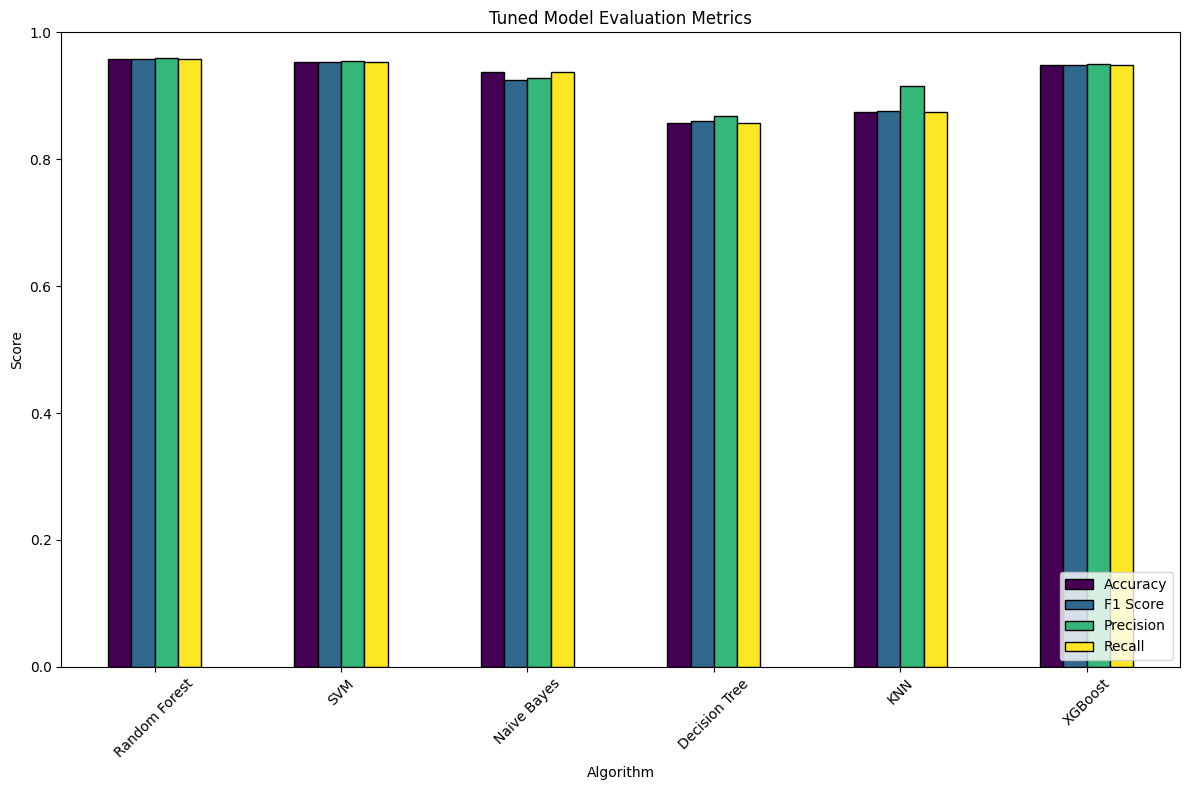

In [155]:

# Plot the evaluation metrics for tuned models
tuned_results_df.plot(kind='bar', figsize=(12, 8), colormap='viridis', edgecolor='black')
plt.title('Tuned Model Evaluation Metrics')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.legend(loc='lower right')
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()



In [157]:
model_pipe.predict(['थोडे सोंस्था जोसि कि बोंबोइचें कोंकणी भाशा मों'])

array(['Konkani'], dtype=object)

In [158]:
model_pipe.predict(['தமிழ், உலகில் உள்ள '])

array(['Tamil'], dtype=object)